# Canary transactions

The [Cardano Foundation](https://cardanofoundation.org/) regularly submits "canary transactions" to measure the delay from submitting a transaction to its first appearing in a block. See [queries.sql](queries.sql) for the `cardano-db-sync` SQL queries for fetching this data from Cardano mainnet.

## Setup up

In [1]:
suppressMessages({
    require(RColorBrewer, quietly=TRUE)
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(magrittr, quietly=TRUE)
})

## Transaction delays in seconds

In [2]:
txs <- fread("canary-txs.csv.gz")
txs %>% summary

      time                            delay         sub_slot_no       
 Min.   :2024-07-22 09:43:30.00   Min.   :-15.00   Min.   :130075117  
 1st Qu.:2024-12-31 23:00:08.00   1st Qu.:  6.00   1st Qu.:144119682  
 Median :2025-05-07 09:56:25.50   Median : 15.00   Median :155045478  
 Mean   :2025-05-04 22:42:32.41   Mean   : 20.89   Mean   :154832241  
 3rd Qu.:2025-09-04 13:51:24.50   3rd Qu.: 28.00   3rd Qu.:165427561  
 Max.   :2026-01-02 14:17:04.00   Max.   :487.00   Max.   :175797123  
  avg_delay_1h     avg_delay_6h    block_utilization 
 Min.   :  1.80   Min.   :  2.00   Min.   :0.003185  
 1st Qu.: 14.20   1st Qu.: 17.80   1st Qu.:0.090130  
 Median : 19.40   Median : 20.40   Median :0.194203  
 Mean   : 20.89   Mean   : 20.89   Mean   :0.262803  
 3rd Qu.: 25.80   3rd Qu.: 23.30   3rd Qu.:0.362532  
 Max.   :307.20   Max.   :172.80   Max.   :0.987238  

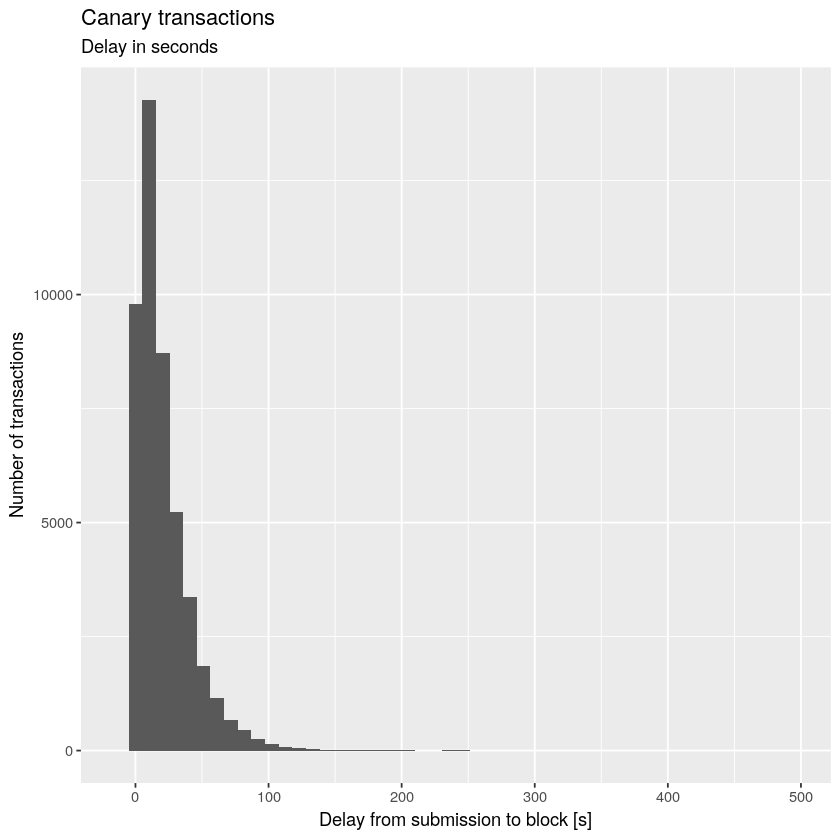

In [3]:
ggplot(txs, aes(x=`delay`)) +
    geom_histogram(bins=50) +
    xlab("Delay from submission to block [s]") +
    ylab("Number of transactions") +
    ggtitle("Canary transactions", "Delay in seconds")

## Transaction delays in blocks

In [4]:
blocks <- fread("canary-blocks.csv.gz")
blocks %>% summary

      time                         block_delay     block_utilization 
 Min.   :2024-07-22 09:43:30.00   Min.   : 1.000   Min.   :0.003185  
 1st Qu.:2024-12-31 23:49:23.00   1st Qu.: 1.000   1st Qu.:0.090099  
 Median :2025-05-07 10:31:28.00   Median : 1.000   Median :0.194081  
 Mean   :2025-05-04 23:19:49.43   Mean   : 1.079   Mean   :0.262800  
 3rd Qu.:2025-09-04 14:06:08.00   3rd Qu.: 1.000   3rd Qu.:0.362527  
 Max.   :2026-01-02 14:17:04.00   Max.   :23.000   Max.   :0.987238  

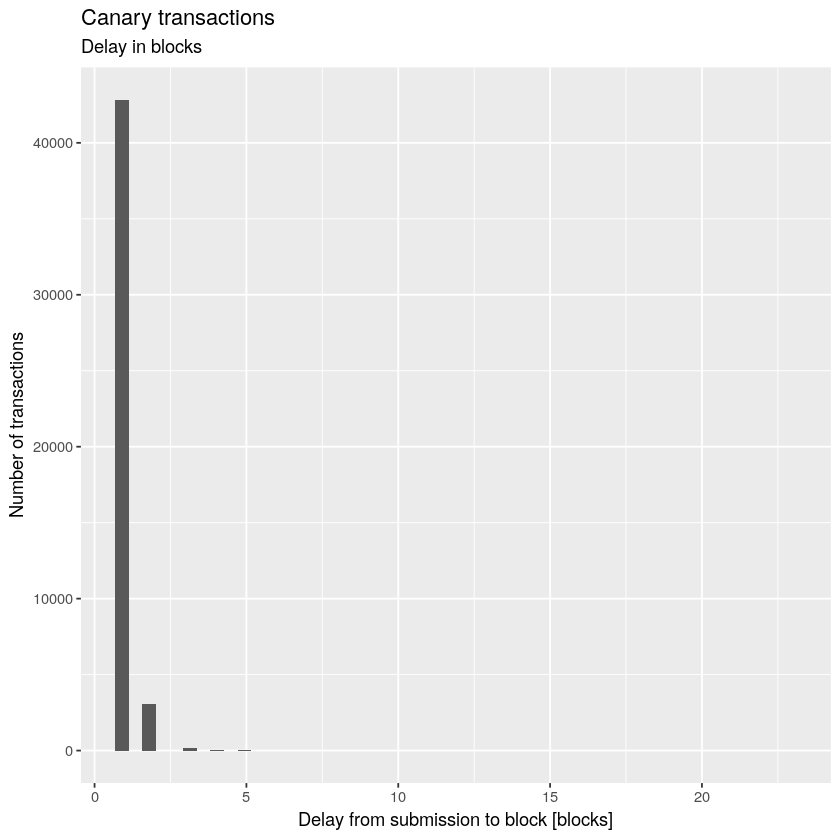

In [5]:
ggplot(blocks, aes(x=`block_delay`)) +
    geom_histogram(bins=50) +
    xlab("Delay from submission to block [blocks]") +
    ylab("Number of transactions") +
    ggtitle("Canary transactions", "Delay in blocks")

## Transaction delay vs block utilization

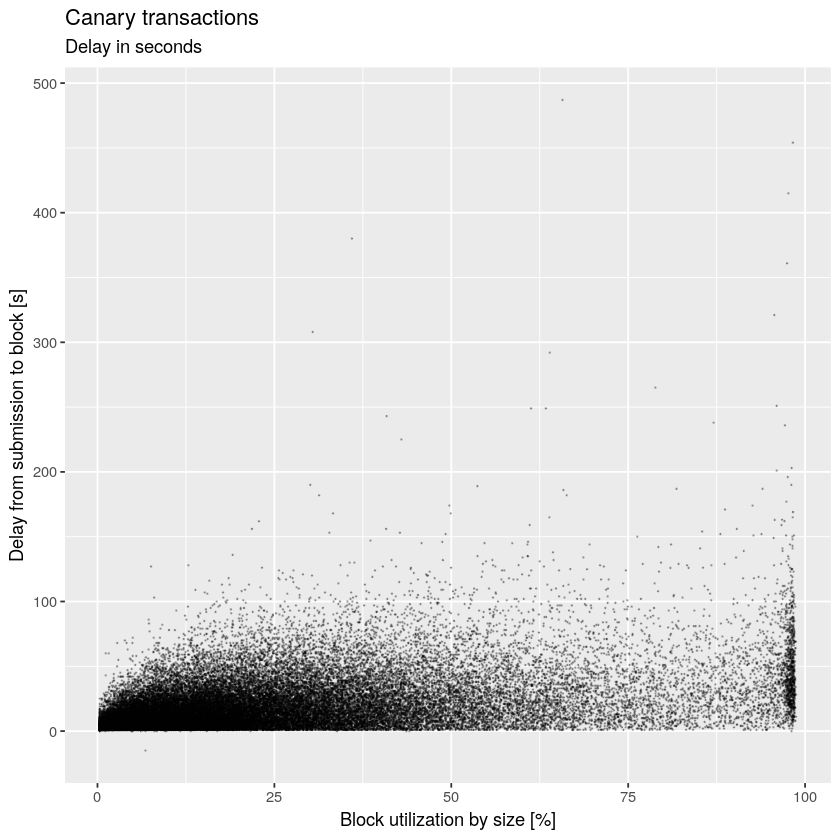

In [6]:
ggplot(txs, aes(x=100*`block_utilization`, y=`delay`)) +
    geom_point(size=0.10, alpha=0.25) +
    xlab("Block utilization by size [%]") +
    ylab("Delay from submission to block [s]") +
    ggtitle("Canary transactions", "Delay in seconds")